# Coursework B

 Some of the code from this notebook is heavily inspired by https://machine-learning-for-physicists.org and is relased under the same Creative Commons License.

### Import Libraries

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.18.0


In [25]:
def addNoiseToMNIST(yNoise, data):
    '''
    Adds noise to data from a uniform distribution between 0 and yNoise
    If adding noise results in value of pixel being greater than 255,
    then noise is subtracted from the value
    Inputs:
    yNoise - Upper limit for noise to be added to data
    data - value which noise is added to
    Returns:
    data - value with noise added
    '''
    noise = np.random.uniform(0, yNoise, data.shape)
    ans = np.add(data, noise)
    return np.clip(ans, None, 255)

## Load the MNIST dataset

The Keras library comes with a number of builtin datasets. One of which is the MNIST library of handwritten digits.


In [26]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
yNoises = np.array([0, 20, 50, 100]) # Remember zero noise means we don't add anything to the image
images = np.zeros((len(yNoises),28,28))
image = train_images[0]

for n in range(len(yNoises)):
  images[n] = addNoiseToMNIST(yNoises[n],image.copy())

In [28]:
print(np.shape(images))

(4, 28, 28)


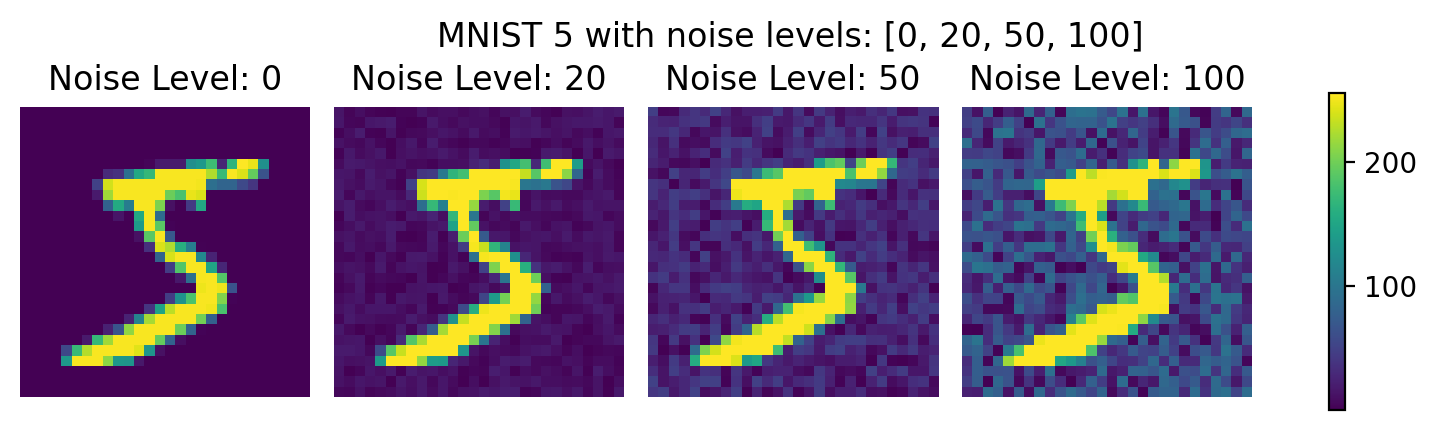

In [29]:
num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))  # Adjust figsize as needed

for i, image in enumerate(images):
    im = axes[i].imshow(image)  # Use appropriate cmap if not grayscale
    axes[i].axis('off')  # Turn off axis ticks and labels
    axes[i].set_title(f'Noise Level: {yNoises[i]}')

# Adjust spacing between subplots
plt.tight_layout()  # Adjust subplot parameters for a tight layout

# Add colorbar to the figure, linked to the last image
fig.colorbar(im, ax=axes.ravel().tolist())

fig.suptitle('MNIST 5 with noise levels: [0, 20, 50, 100]', y=1.05)  # Add a title to the figure

plt.show()

In [30]:
# Scale pixel value to between 0 and 1 before training them, otherwise model fit does not work
train_images=train_images/255.0
test_images=test_images/255.0

## Building our neural network

Now we will use Keras to build our neural network.

### Set up the layers

A neural network is made up of layers and in the simple case these layers are applied sequentially.

In [31]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

This model has three layers:
1. The first layer simply 'flattens' our 28x28 pixel image into a 1-dimensional array of length 784 (=28x28). (Despite all the fancy features most neural networks are at heart one-dimensional in temrs of input*** of course higher dimensionality can always be squashed down to a larger single dimension). This layer has no paramters.
2. The second layer is fully connected (or *dense*) layer with 128 nodes. This layer has parameters.
3. The third layer is the output layer and has 10 nodes which correspond to the digits 0:9. This layer has parameters.

## From layers to a compiled model

Before we can train the model we need to determine the:
- *Loss function* - This is used to tell us how well our model is doing in
- *Optimiser* - This is how the model gets updated based on the data and the loss function
- *Metrics* - Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [32]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

## Train the model
To train the model we need to show the training data to the model. In our case the training data is the `train_images` and `train_labels` arrays. The model will hopefully *learn* how to associate the images and the labels.

### Fitting the model to the data
The training process is also called fitting the model to the data (for obvious reasons). The Keras syntax for fitting the model uses `model.fit`

In [34]:
model.fit(train_images, train_labels,batch_size=100, epochs=20)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9881 - loss: 0.0378
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9886 - loss: 0.0350
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9906 - loss: 0.0302
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9914 - loss: 0.0281
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9924 - loss: 0.0231
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9929 - loss: 0.0212
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9942 - loss: 0.0169
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9945 - loss: 0.0177
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9947 - loss: 0.0151
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9962 - loss: 0.0112
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9966 - loss: 0.0109
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

In the above output you can see that the model improves the loss (this number gets smaller) and accuracy (this number gets bigger) with each epoch. But doing well on the training data set is a bit like marking your own homework. A fairer test is to evaluate the performance on the testing data set (which the model has not seen).

In [35]:
# Lets check what the test iamges look like
print(np.shape(test_images))
# model is just the neural network that we trained and it has a function .evaluate
# that executes itself on some test_images and compares its predictions to the
# test_lables to asses its performance. Verbose is just the amount of output
# shown at the bottom
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 1s - 2ms/step - accuracy: 0.9791 - loss: 0.1159

Test accuracy: 0.9790999889373779


This is above the 95% test accuracy threshold as required.

In [36]:
# lets now try to apply this to our test images
test_shape = np.shape(test_images)
test_images_noisy = np.zeros((len(yNoises),test_shape[0],test_shape[1],test_shape[2]))
test_images_noisy[0] = test_images.copy()

# We're going to add different levels of noise to each image
# for each image in test, we're going to add some noise to it.
# We already kept a control copy of the images as the first entry of test_images_noisy

for n in range(1, len(yNoises)):
  test_images_noisy[n] = addNoiseToMNIST(yNoises[n] / 255, test_images.copy()) # divide the noise by 255

In [37]:
# Lets check what the noisy test iamges look like
print(np.shape(test_images_noisy))

(4, 10000, 28, 28)


In [38]:
# Now lets check out how accurate the model is at each level
accuracy_array = np.zeros(len(yNoises))
for n in range(len(yNoises)):
  test_loss, test_acc = model.evaluate(test_images_noisy[n],  test_labels, verbose=0) # Let's adjust the verbose so we dont get too much informatiion
  accuracy_array[n] = test_acc
  print(f'Test accuracy for noise level {yNoises[n]} is {test_acc} with loss {test_loss}')

Test accuracy for noise level 0 is 0.9790999889373779 with loss 0.11592806130647659
Test accuracy for noise level 20 is 0.9746000170707703 with loss 0.12613606452941895
Test accuracy for noise level 50 is 0.9196000099182129 with loss 0.3237937390804291
Test accuracy for noise level 100 is 0.6919000148773193 with loss 1.8231117725372314


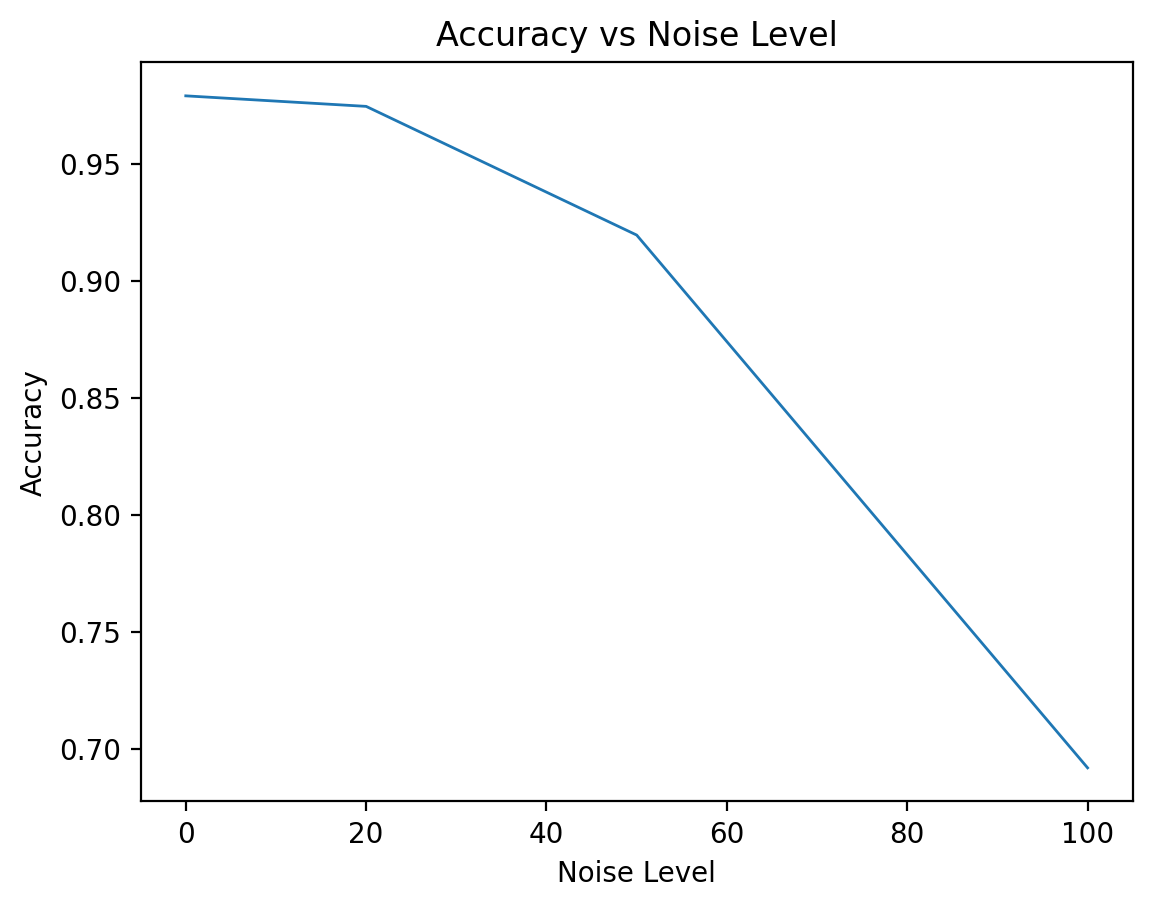

In [39]:
# Lets plot this as well
fig,ax=plt.subplots()
ax.plot(yNoises, accuracy_array, linewidth=1)
ax.set_xlabel("Noise Level")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Noise Level")
plt.show()

As you can see, the performance of the neural network trained on our unnoisy data decreases as we add noise. Lets try to retrain our model with the noisy data.

We're going to add a level of noise to the training data, train the neural network, test it and then try a new noise level.    

In [40]:
# So we need to create arrays to store our test accuracies with different noise levels
# This is going to be a square array since we're adding each noise and then testing it
yNoisesRange = np.linspace(0, 200, 11) # We're going to try a wider range of noises
test_acc_array = np.zeros((len(yNoises), len(yNoisesRange)))

test_images_noisy = np.zeros((len(yNoisesRange),test_shape[0],test_shape[1],test_shape[2])) # Make a new array for wider range of noises
test_images_noisy[0] = test_images.copy()

for n in range(len(yNoisesRange)):
  test_images_noisy[n] = addNoiseToMNIST(yNoisesRange[n] / 255,test_images.copy()) # divide the noise by 255

In [44]:
for n in range(0, len(yNoises)):
  # Create a new model, this is the same as retraining our neural network with random initial weights

  modelNoisy = keras.Sequential([
      keras.layers.Input(shape=(28,28)),
      keras.layers.Flatten(),
      keras.layers.Dense(128,activation='relu'),
      keras.layers.Dense(10)
  ])
  modelNoisy.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     optimizer=tf.keras.optimizers.SGD(learning_rate=0.2),metrics=['accuracy'])
  # We changed our learning rate to 0.7 as it worked better, using one as previosly made the model
  # learn too fast and become inaccurate, especially with a fair amount of noise was added
  train_images_noisy = np.zeros((test_shape[0],test_shape[1],test_shape[2]))
  new_image_set = addNoiseToMNIST(yNoises[n] / 255,train_images.copy())
  modelNoisy.fit(new_image_set, train_labels,batch_size=100, epochs=20)

  # Now lets check out how accurate the model is at each level
  accuracy_array = np.zeros(len(yNoisesRange))
  for k in range(len(yNoisesRange)):
    test_loss, test_acc = modelNoisy.evaluate(test_images_noisy[k], test_labels, verbose=0)
    accuracy_array[k] = test_acc

  test_acc_array[n] = accuracy_array

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8419 - loss: 0.5602
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9446 - loss: 0.1932
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9620 - loss: 0.1368
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9682 - loss: 0.1127
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9735 - loss: 0.0932
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9780 - loss: 0.0766
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9813 - loss: 0.0681
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9827 - loss: 0.0604
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9857 - loss: 0.0529
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9876 - loss: 0.0478
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0402
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

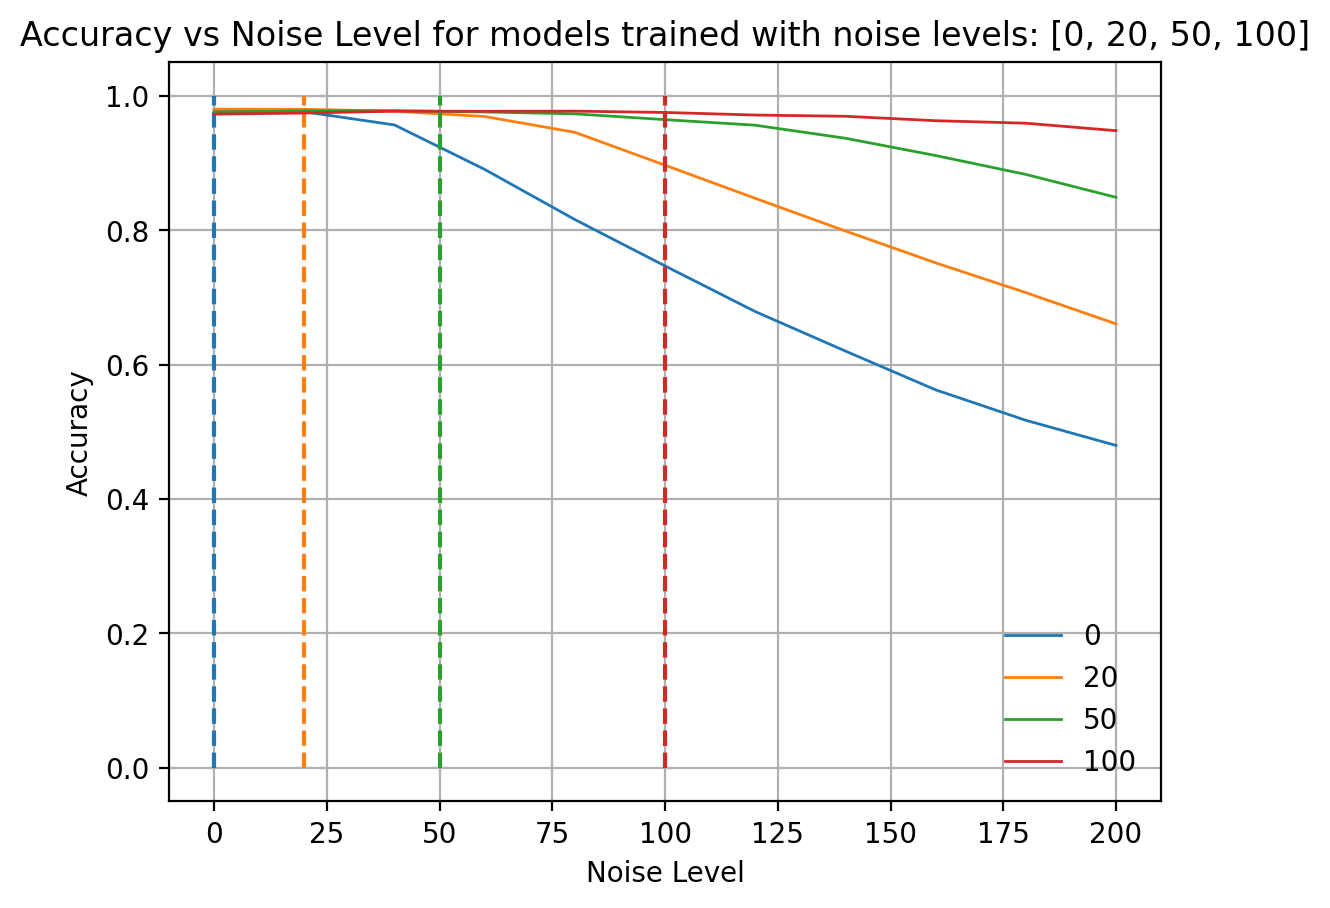

In [45]:
# Let's now plot the accuracies of the models when trained with different noise levels
# Plot verticle lines at boundaries of trained region
y_min = 0    # Start of the vertical line
y_max = 1   # End of the vertical line
# Create array for colours

# Create Subplots
fig,ax=plt.subplots()
for i in range(len(test_acc_array)):
  noise = yNoises[i]
  ax.plot(yNoisesRange, test_acc_array[i], linewidth=1, label = f'{noise}', color = f'C{i}')
  ax.plot([noise, noise], [y_min, y_max], linestyle='--', color=f'C{i}')

ax.set_xlabel("Noise Level")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Noise Level for models trained with noise levels: [0, 20, 50, 100]")
ax.legend()
ax.grid()

plt.show()

Let's zoom in further by restricing our axes.

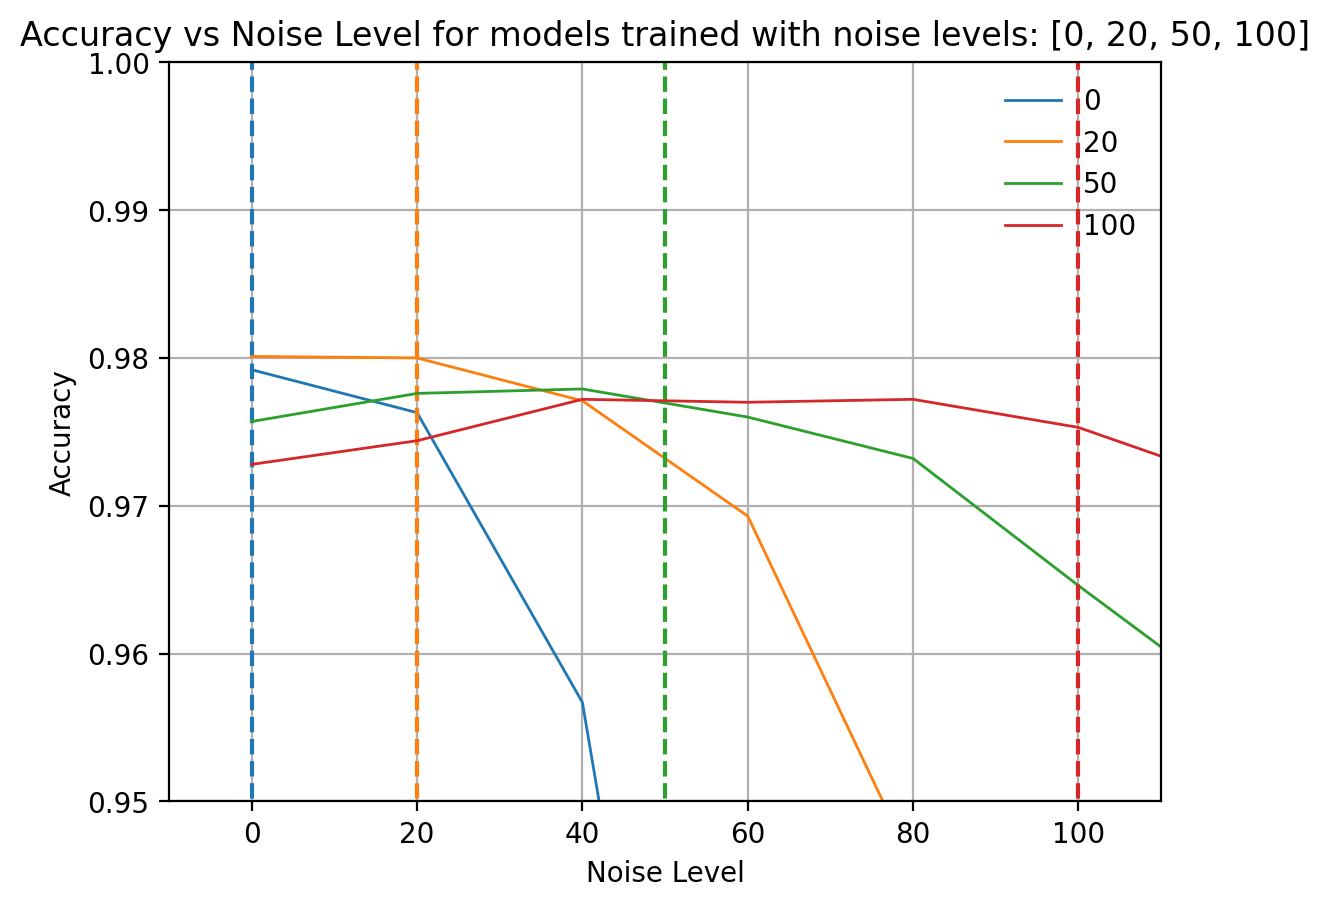

In [48]:
fig,ax=plt.subplots()
for i in range(len(test_acc_array)):
  noise = yNoises[i]
  ax.plot(yNoisesRange, test_acc_array[i], linewidth=1, label = f'{noise}', color = f'C{i}')
  ax.plot([noise, noise], [y_min, y_max], linestyle='--', color=f'C{i}')

ax.set_xlabel("Noise Level")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Noise Level for models trained with noise levels: [0, 20, 50, 100]")
ax.legend()
ax.grid()

# Restrict axes
ax.set_xlim(-10, 110)
ax.set_ylim(0.95, 1.0)

plt.show()

We can see from above that as you increase the noise the models are training with, their accuracy increases over the whole testing data. The model trained with a noise level of 100 performs the best. Some of the models even beat other models at their own noise level.

The accuracy of the models peak approximatley at the images they were trained on themselves, before falling off somewhat rapidly after, as seen better in the 2nd graph.

The way we define performance depends on our needs. Different models perform better on different sets of data so in order to find the 'best' model, one needs to consider what range of noise will their data will mostly likely have and see which models peform the best between the range.